**Sales Revenue prediction**

Import Required Libraries()

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and Preview the Dataset

In [62]:
df = pd.read_csv("/content/sales_revenue.csv")
df.head()

,tv_ad_spend_usd,digital_ad_spend_usd,print_ad_spend_usd,radio_ad_spend_usd,product_category,season,promotion_budget_usd,sales_team_size,market_share_percent,competitor_activity,economic_conditions,distribution_coverage,product_launch_year,revenue_usd
0,82842.366230,14361.851432,29286.417709,4200.090918,Beauty,Summer,21069.965290,33.0,16.270847,High,Stable,Regional,2019.0,2.592800e+06
1,36070.976741,36778.517102,NaN,14185.194830,Electronics,Fall,6897.088764,38.0,17.726201,High,Stable,NaN,2022.0,1.154373e+06
2,61120.461383,13361.274023,20013.654768,NaN,Sports,Fall,39338.066257,19.0,10.923855,Medium,Stable,National,2016.0,3.058573e+05
3,56177.640956,25852.220835,9703.041811,4907.227400,Electronics,NaN,1445.901392,10.0,10.218092,NaN,Recession,International,2018.0,3.706296e+06
4,96904.537224,75592.292995,NaN,3875.974965,Beauty,Summer,NaN,43.0,10.495740,Low,Stable,Regional,NaN,1.047622e+06


Check Dataset Dimensions(rows n columns n size)

In [ ]:
df.shape

(1000, 14)

understand the structure of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tv_ad_spend_usd        940 non-null    float64
 1   digital_ad_spend_usd   948 non-null    float64
 2   print_ad_spend_usd     942 non-null    float64
 3   radio_ad_spend_usd     954 non-null    float64
 4   product_category       941 non-null    object 
 5   season                 950 non-null    object 
 6   promotion_budget_usd   946 non-null    float64
 7   sales_team_size        949 non-null    float64
 8   market_share_percent   949 non-null    float64
 9   competitor_activity    942 non-null    object 
 10  economic_conditions    947 non-null    object 
 11  distribution_coverage  959 non-null    object 
 12  product_launch_year    947 non-null    float64
 13  revenue_usd            953 non-null    float64
dtypes: float64(9), object(5)
memory usage: 109.5+ KB


In [ ]:
df.describe()

,tv_ad_spend_usd,digital_ad_spend_usd,print_ad_spend_usd,radio_ad_spend_usd,promotion_budget_usd,sales_team_size,market_share_percent,product_launch_year,revenue_usd
count,940.000000,948.000000,942.000000,954.000000,946.000000,949.000000,949.000000,947.000000,9.530000e+02
mean,51578.741373,41848.269863,15605.499667,10488.132454,25903.139640,27.048472,15.307709,2015.977825,2.639845e+06
std,26849.778504,22709.093116,8500.065405,5721.099124,14689.379317,13.030141,8.250859,3.726162,1.391152e+06
min,5116.284236,2081.407669,1010.523870,539.908539,120.240968,5.000000,1.118178,2010.000000,1.000716e+05
25%,28261.509970,22245.378825,8190.790464,5442.591318,13176.121224,16.000000,8.130714,2013.000000,1.473874e+06
50%,50252.869946,42343.774872,15764.006264,10918.943983,26080.443000,27.000000,15.107858,2016.000000,2.624888e+06
75%,74270.075511,61238.214185,23237.437623,15390.409327,38933.432798,38.000000,22.497588,2019.000000,3.848539e+06
max,99944.214986,79954.327488,29923.029201,19951.136848,49984.715375,49.000000,29.965560,2022.000000,4.996819e+06


Analysing missing values

In [ ]:
df.isnull().sum()

,0
tv_ad_spend_usd,60
digital_ad_spend_usd,52
print_ad_spend_usd,58
radio_ad_spend_usd,46
product_category,59
season,50
promotion_budget_usd,54
sales_team_size,51
market_share_percent,51
competitor_activity,58


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-852418148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
tv_ad_spend_usd,0
digital_ad_spend_usd,0
print_ad_spend_usd,0
radio_ad_spend_usd,0
product_category,0
season,0
promotion_budget_usd,0
sales_team_size,0
market_share_percent,0
competitor_activity,0


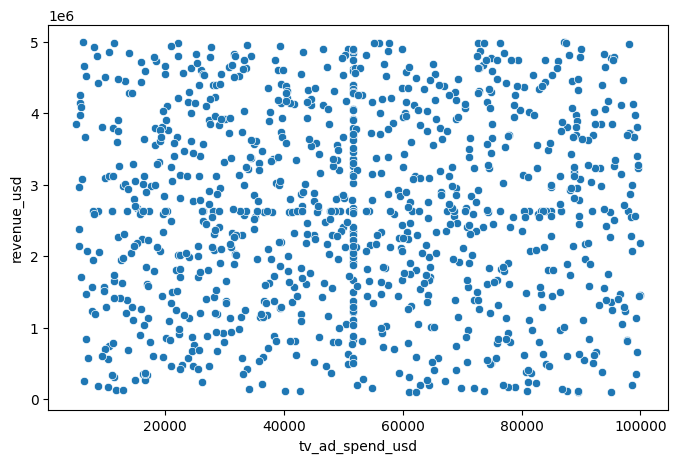

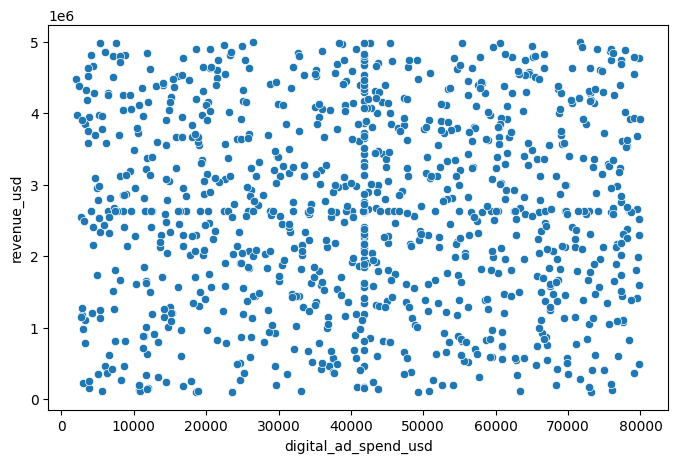

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="tv_ad_spend_usd", y="revenue_usd", data=df)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="digital_ad_spend_usd", y="revenue_usd", data=df)
plt.show()


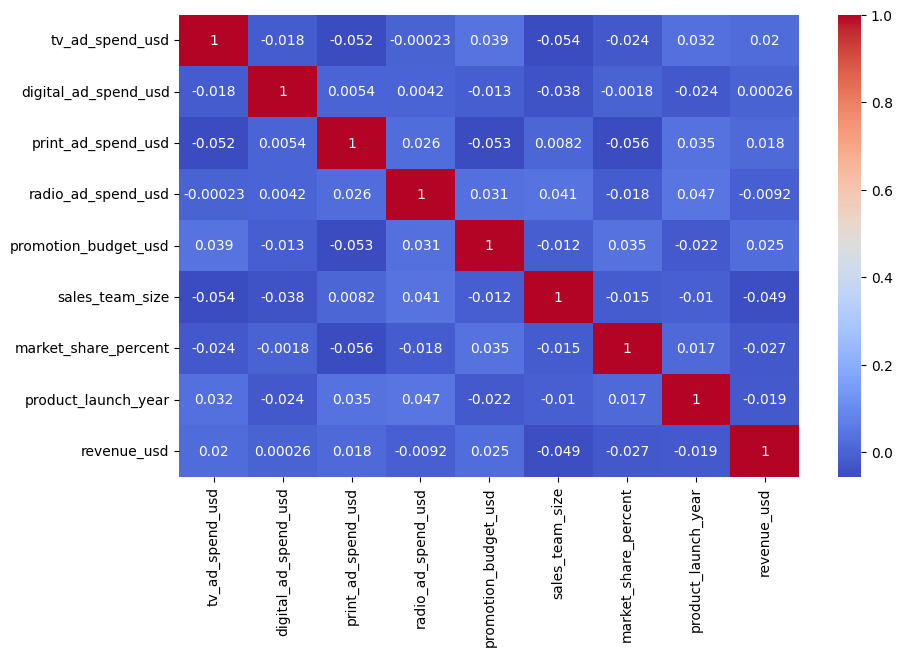

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.drop("revenue_usd", axis=1)
y = df_encoded["revenue_usd"]

In [ ]:
df_encoded.isnull().sum()


,0
tv_ad_spend_usd,0
digital_ad_spend_usd,0
print_ad_spend_usd,0
radio_ad_spend_usd,0
promotion_budget_usd,0
sales_team_size,0
market_share_percent,0
product_launch_year,0
revenue_usd,0
product_category_Beauty,0


In [ ]:
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan)



In [ ]:
df_encoded.isnull().sum()


,0
tv_ad_spend_usd,0
digital_ad_spend_usd,0
print_ad_spend_usd,0
radio_ad_spend_usd,0
promotion_budget_usd,0
sales_team_size,0
market_share_percent,0
product_launch_year,0
revenue_usd,0
product_category_Beauty,0


In [ ]:
X = df[[
    "tv_ad_spend_usd",
    "digital_ad_spend_usd",
    "print_ad_spend_usd",
    "radio_ad_spend_usd",
    "promotion_budget_usd",
    "sales_team_size",
    "market_share_percent"
]]

y = df["revenue_usd"]



In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
X = X.fillna(X.mean())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(X_train.shape)

(800, 7)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1052456.4537113355
R2 Score: 0.002806863995039599


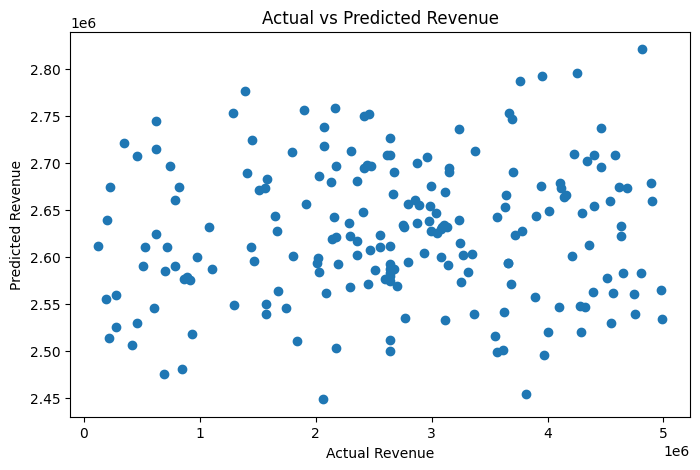

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tv_ad_spend_usd        1000 non-null   float64
 1   digital_ad_spend_usd   1000 non-null   float64
 2   print_ad_spend_usd     1000 non-null   float64
 3   radio_ad_spend_usd     1000 non-null   float64
 4   product_category       1000 non-null   object 
 5   season                 1000 non-null   object 
 6   promotion_budget_usd   1000 non-null   float64
 7   sales_team_size        1000 non-null   float64
 8   market_share_percent   1000 non-null   float64
 9   competitor_activity    1000 non-null   object 
 10  economic_conditions    1000 non-null   object 
 11  distribution_coverage  1000 non-null   object 
 12  product_launch_year    1000 non-null   float64
 13  revenue_usd            1000 non-null   float64
dtypes: float64(9), object(5)
memory usage: 109.5+ KB


Product Category vs Revenue

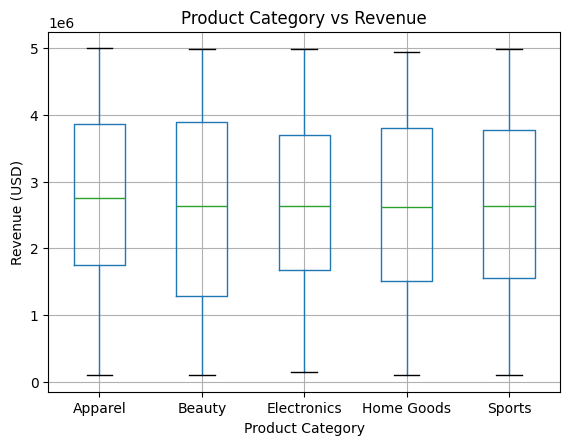

In [ ]:
df.boxplot(column='revenue_usd', by='product_category')
plt.xlabel('Product Category')
plt.ylabel('Revenue (USD)')
plt.title('Product Category vs Revenue')
plt.suptitle('')
plt.show()

Season vs Revenue

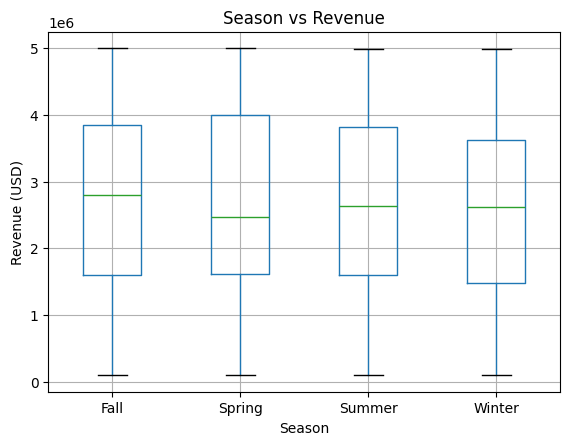

In [ ]:
df.boxplot(column='revenue_usd', by='season')
plt.xlabel('Season')
plt.ylabel('Revenue (USD)')
plt.title('Season vs Revenue')
plt.suptitle('')
plt.show()

Competitor Activity vs Revenue

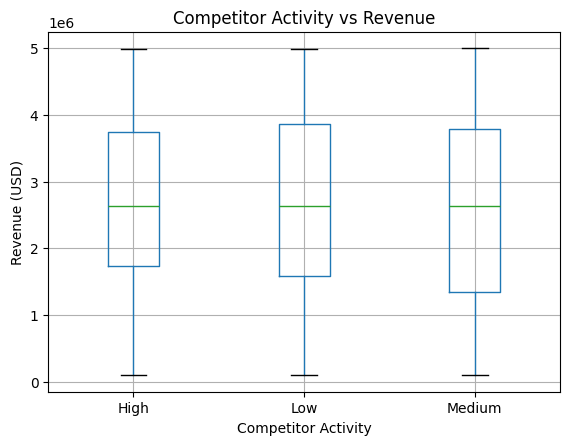

In [ ]:
df.boxplot(column='revenue_usd', by='competitor_activity')
plt.xlabel('Competitor Activity')
plt.ylabel('Revenue (USD)')
plt.title('Competitor Activity vs Revenue')
plt.suptitle('')
plt.show()

Economic Conditions vs Revenue

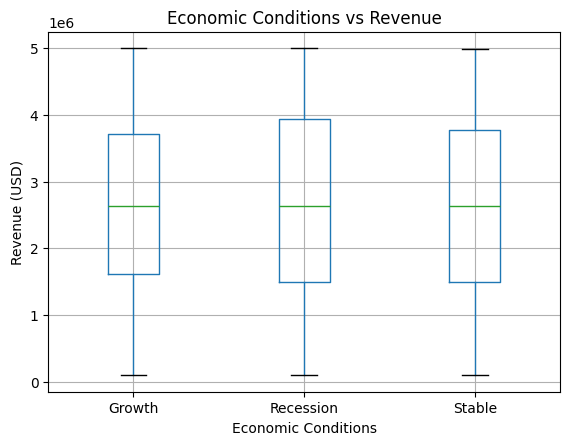

In [ ]:
df.boxplot(column='revenue_usd', by='economic_conditions')
plt.xlabel('Economic Conditions')
plt.ylabel('Revenue (USD)')
plt.title('Economic Conditions vs Revenue')
plt.suptitle('')
plt.show()

Distribution Coverage vs Revenue

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def predict_revenue(tv, digital, print_ad, radio, promo_budget, sales_team, market_share):

    input_data = [[tv, digital, print_ad, radio, promo_budget, sales_team, market_share]]

    prediction = rf.predict(input_data)

    return f"Predicted Revenue: ${round(prediction[0], 2)}"

In [ ]:
interface = gr.Interface(
    fn=predict_revenue,
    inputs=[
        gr.Number(label="TV Ad Spend"),
        gr.Number(label="Digital Ad Spend"),
        gr.Number(label="Print Ad Spend"),
        gr.Number(label="Radio Ad Spend"),
        gr.Number(label="Promotion Budget"),
        gr.Number(label="Sales Team Size"),
        gr.Number(label="Market Share (%)")
    ],
    outputs="text",
    title="Sales Revenue Prediction App",
    description="Predict revenue based on advertising spend across channels."
)

In [ ]:
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fda8b557cbe1be8be9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pickle
pickle.dump(rf, open("model7.pkl", "wb"))
